PRICE PREDICTOR

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('data.csv')

   1.CRIM       per capita crime rate by town 
   
   
   2.ZN        proportion of residential land zoned for lots over  25,000 sq.ft.
   
   
   3.INDUS     proportion of non-retail business acres per town
   
   
   4.CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
   
   
   5.NOX       nitric oxides concentration (parts per 10 million)
   
   
   6.RM        average number of rooms per dwelling
   
   
   7.AGE       proportion of owner-occupied units built prior to 1940
   
   
   8.DIS       weighted distances to five Boston employment centres
   
   
   9.RAD       index of accessibility to radial highways
   
   
   10.AX      full-value property-tax rate per $10,000
   
   
   11. PTRATIO  pupil-teacher ratio by town
   
   
   12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
   
   
   13. LSTAT    % lower status of the population
   
   
   14. MEDV     Median value of owner-occupied homes in $1000's
   
   

In [3]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


<Axes: >

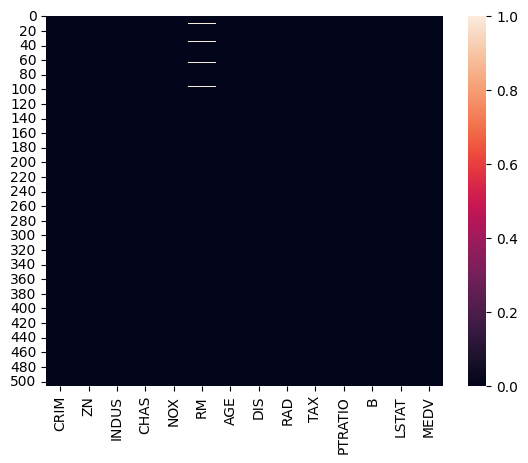

In [4]:
 sns.heatmap(data.isnull())

In [5]:
data.dropna(how='any',inplace=True)

<Axes: >

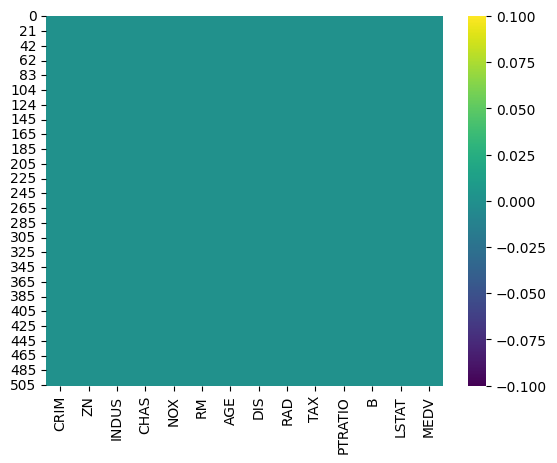

In [6]:
 sns.heatmap(data.isnull(),cmap='viridis')

In [7]:
data.shape

(501, 14)

In [8]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [9]:
data.CHAS.value_counts()

CHAS
0    466
1     35
Name: count, dtype: int64

In [10]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,3.647414,11.402196,11.160619,0.069860,0.555151,6.284341,68.513373,3.786423,9.596806,409.143713,18.453493,356.298523,12.643752,22.561277
std,8.637688,23.414214,6.857123,0.255166,0.116186,0.705587,28.212221,2.103327,8.735509,169.021216,2.166327,91.672055,7.162746,9.232435
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081990,0.000000,5.190000,0.000000,0.449000,5.884000,45.000000,2.088200,4.000000,279.000000,17.400000,375.210000,6.920000,17.000000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.182700,5.000000,330.000000,19.000000,391.340000,11.380000,21.200000
75%,3.693110,12.500000,18.100000,0.000000,0.624000,6.625000,94.000000,5.118000,24.000000,666.000000,20.200000,396.230000,16.940000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

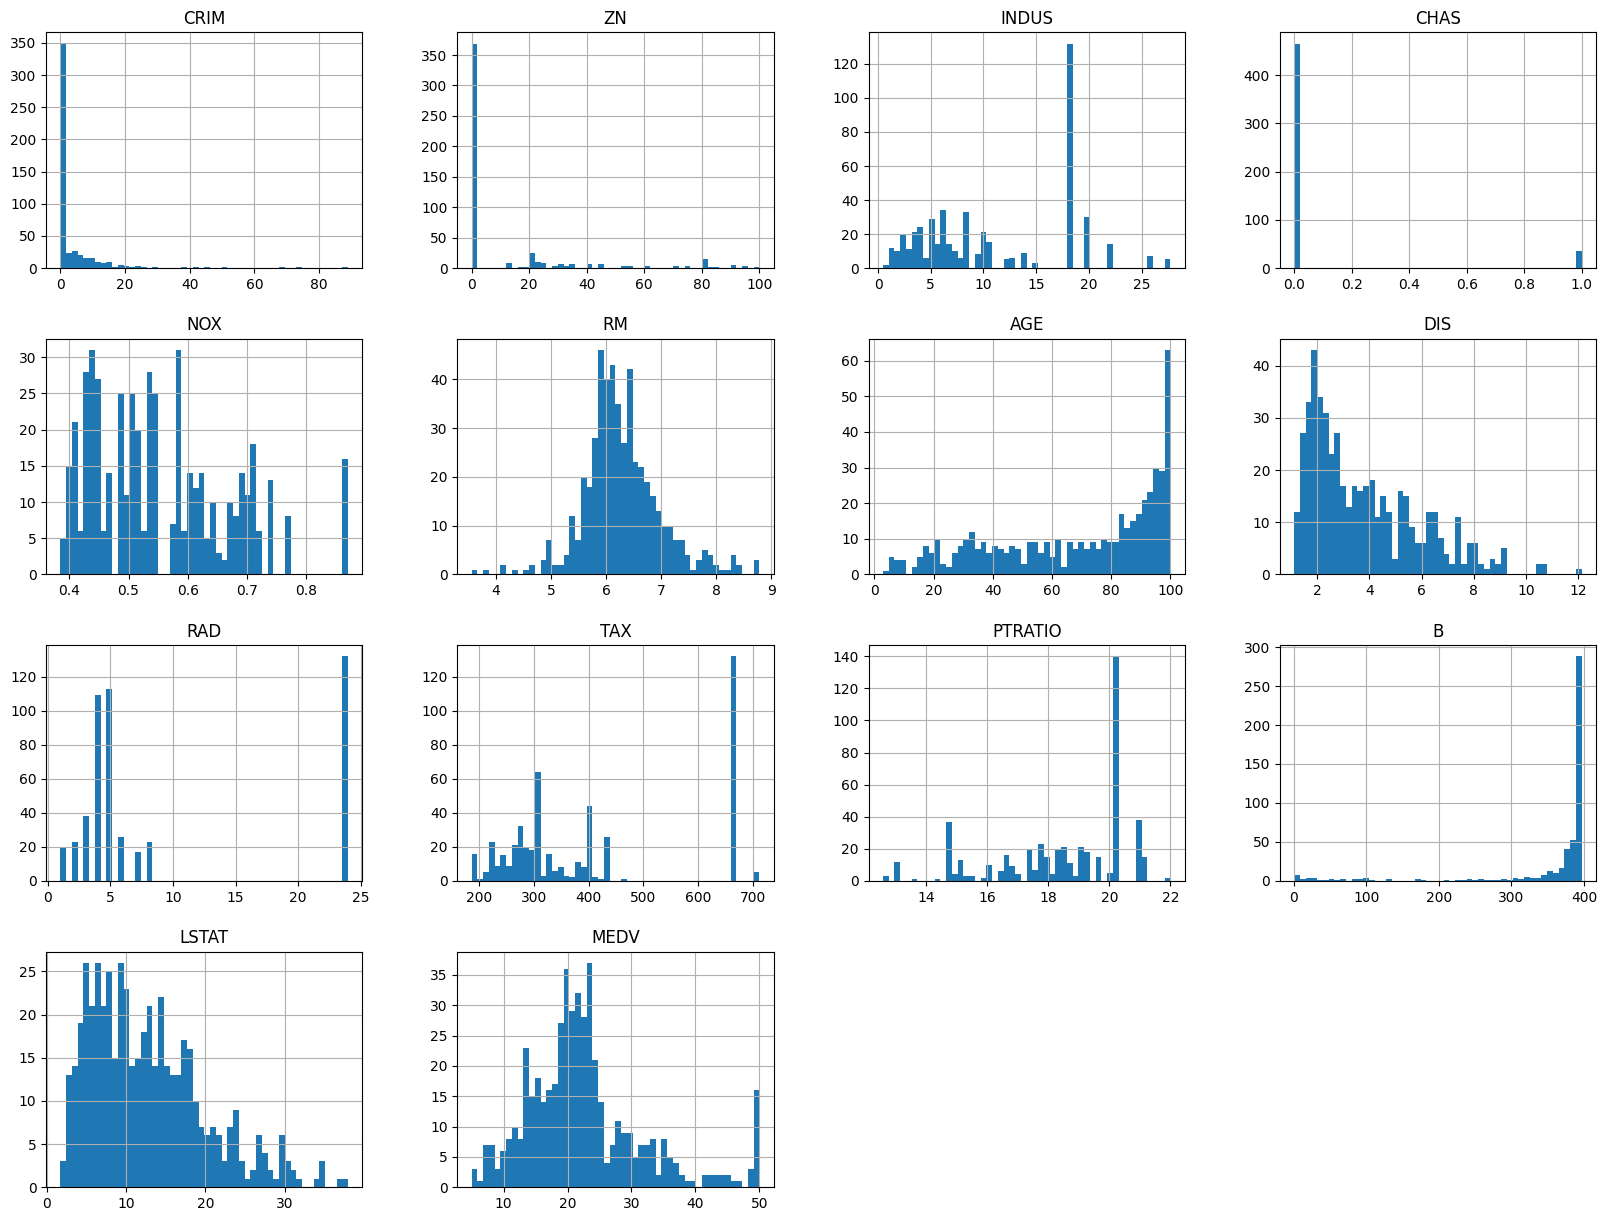

In [11]:
data.hist(bins=50,figsize=(20,15))

In [12]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(data,test_size=0.2)

In [13]:
train_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
74,0.07896,0.0,12.83,0,0.437,6.273,6.0,4.2515,5,398,18.7,394.92,6.78,24.1
310,2.63548,0.0,9.90,0,0.544,4.973,37.8,2.5194,4,304,18.4,350.45,12.64,16.1
412,18.81100,0.0,18.10,0,0.597,4.628,100.0,1.5539,24,666,20.2,28.79,34.37,17.9
207,0.25199,0.0,10.59,0,0.489,5.783,72.7,4.3549,4,277,18.6,389.43,18.06,22.5
252,0.08221,22.0,5.86,0,0.431,6.957,6.8,8.9067,7,330,19.1,386.09,3.53,29.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,2.77974,0.0,19.58,0,0.871,4.903,97.8,1.3459,5,403,14.7,396.90,29.29,11.8
371,9.23230,0.0,18.10,0,0.631,6.216,100.0,1.1691,24,666,20.2,366.15,9.53,50.0
194,0.01439,60.0,2.93,0,0.401,6.604,18.8,6.2196,1,265,15.6,376.70,4.38,29.1
299,0.05561,70.0,2.24,0,0.400,7.041,10.0,7.8278,5,358,14.8,371.58,4.74,29.0


In [14]:
train_data.CHAS.value_counts()

CHAS
0    376
1     24
Name: count, dtype: int64

In [15]:
test_data.CHAS.value_counts()

CHAS
0    90
1    11
Name: count, dtype: int64

In [16]:
372/28

13.285714285714286

In [17]:
94/7

13.428571428571429

<Axes: xlabel='RM', ylabel='MEDV'>

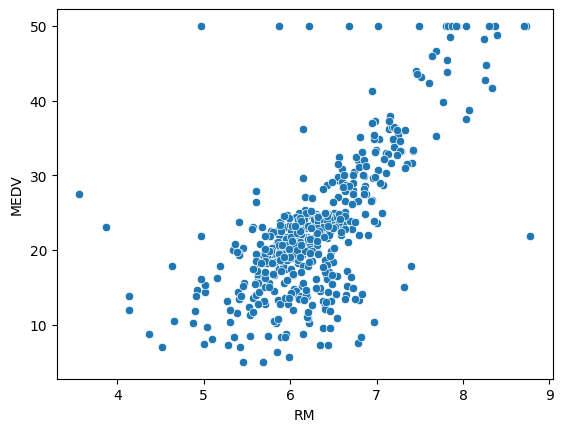

In [18]:
sns.scatterplot(x=data.RM,y=data.MEDV)

<Axes: xlabel='RM', ylabel='MEDV'>

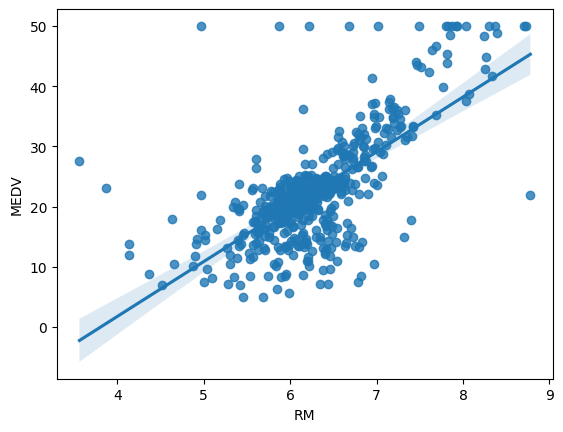

In [19]:
sns.regplot(x=data.RM,y=data.MEDV)

In [20]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [21]:
data[data.RM.isnull()]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


In [22]:
data['TAXRM']=data.TAX/data.RM

In [23]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,41.407553
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,44.607843
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,39.134174
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,40.182514


<Axes: xlabel='TAXRM', ylabel='MEDV'>

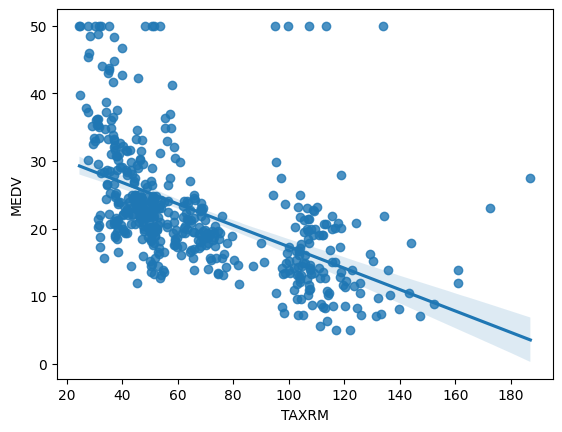

In [24]:
 sns.regplot(x=data.TAXRM,y=data.MEDV)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
svm=SVR()
rf=RandomForestRegressor(n_estimators=1500)
lr=LinearRegression()

In [26]:
X=data.drop(['MEDV'],axis=1)
Y=data.MEDV

In [27]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [28]:
lr.fit(X_train,Y_train)
lr.score(X_test,Y_test)

0.8358389729582956

In [29]:
svm.fit(X_train,Y_train)
svm.score(X_test,Y_test)

0.25714580799534104

In [30]:
rf.fit(X_train,Y_train)
rf.score(X_test,Y_test)

0.8856707627373958

AS WE CAN SEE THE RANDOM FOREST REGRESSOR HAS THE HIGHEST ACCURACY , IT ALMOST HAS 86 PERCENT ACCURACY 
WHICH IS PRETTY DECENT 

In [31]:
from sklearn.model_selection import cross_val_score
cross_val_score(RandomForestRegressor(n_estimators=1500),X,Y)

array([0.76728091, 0.86740677, 0.65279634, 0.42931519, 0.23457309])

In [32]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [33]:
dt.fit(X_train,Y_train)
dt.score(X_test,Y_test)

0.5876737252713151

random forest provides highest accuracy aming linearregressor,svm,decision tree and random forest

# ROUGH WORK

In [34]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    #     ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])


In [41]:
data_num_tr = my_pipeline.fit_transform(X)

In [42]:
some_data = X.iloc[:5]

In [43]:
prepared_data = my_pipeline.transform(some_data)

In [44]:
prepared_data[0]

array([-0.42195706,  0.28206793, -1.29200912, -0.2740571 , -0.14776474,
        0.41235069, -0.117562  ,  0.14447619, -0.98510566, -0.67007446,
       -1.45714146,  0.44334185, -1.0710156 , -0.6966326 ])

# saving the model

In [45]:
from joblib import dump,load
dump(rf,'real_estate.joblib')

['real_estate.joblib']